# *Advanced example* from the docs: gaussian ring

In [1]:
# Configuration
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
try:
    from cobaya.run import run
except ImportError:
    sys.path.insert(0,'../../cobaya')
    from cobaya.run import run

### Defining the *Gaussian ring* likelihood and priors for its parameters

In [2]:
import numpy as np
from scipy import stats

def gauss_ring_logp(x, y):
    return stats.norm.logpdf(np.sqrt(x**2+y**2), loc=1, scale=0.2)

info = {"likelihood": {"ring": gauss_ring_logp}}

In [3]:

info["params"] = dict([
    ["x", {"prior": {"min": -2, "max": 2}, "ref": 1, "proposal": 0.2}],
    ["y", {"prior": {"min": -2, "max": 2}, "ref": 0, "proposal": 0.2}]])

### Defining *dynamical* derived parameters: radius and angle

In [4]:
r = "lambda x,y: np.sqrt(x**2+y**2)"
theta = "lambda x,y: np.arctan(y/x)"

info["params"]["r"] = {"derived": r}
info["params"]["theta"] = {"derived": theta, "latex": r"\theta", "min": -np.pi/2, "max": np.pi/2}

### Sample and plot!

In [12]:
# Very non-gaussian shape: increase the default convergence criterion
info["sampler"] = {"mcmc": {"Rminus1_stop": 0.002}}

from cobaya.run import run
updated_info, sampler = run(info)

[ring] Initialized external likelihood.
[model] Setting measured speeds (per sec): {ring: 7750.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[mcmc] Initial point: x:1.00001, y:0
[mcmc] Sampling! (NB: no accepted step will be saved until 40 burn-in samples have been obtained)
[mcmc] Progress at [2020-02-27 20:29:13] : 1 steps taken -- still burning in, 40 accepted steps left.
[mcmc] Finished burn-in phase: discarded 40 accepted steps.
[mcmc] Checkpoint: 80 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.533
[mcmc] Convergence of means: R-1 = 4.491929 after 80 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 160 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.371
[mcmc] Convergence of means: R-1 = 0.273704 after 160 accepted steps
[mcmc] Updated covariance 

[mcmc] Checkpoint: 2480 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.207
[mcmc] Convergence of means: R-1 = 0.013113 after 2480 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2560 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.207
[mcmc] Convergence of means: R-1 = 0.019751 after 2560 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2640 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.206
[mcmc] Convergence of means: R-1 = 0.012148 after 2640 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2720 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.206
[mcmc] Convergence of means: R-1 = 0.002338 after 2720 accepted steps
[mcmc] Updated cov

[root] *WARNING* outlier fraction 0.0038194444444444443 


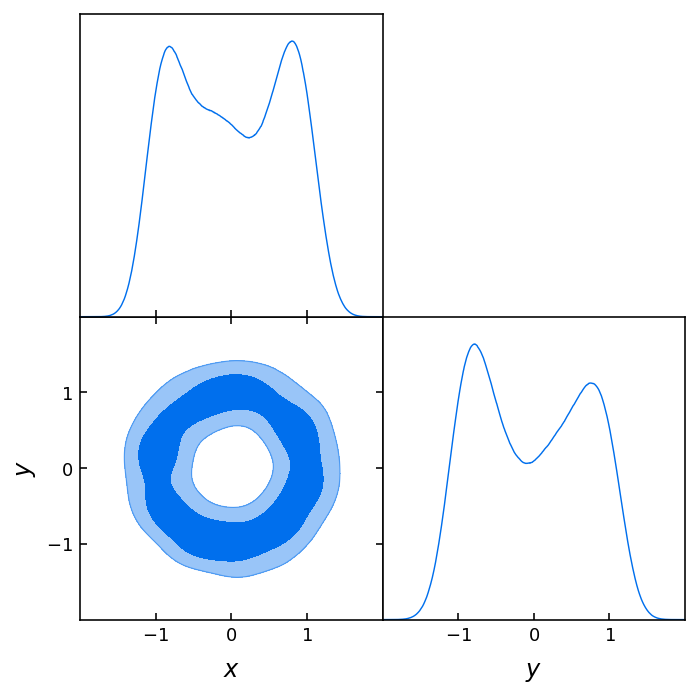

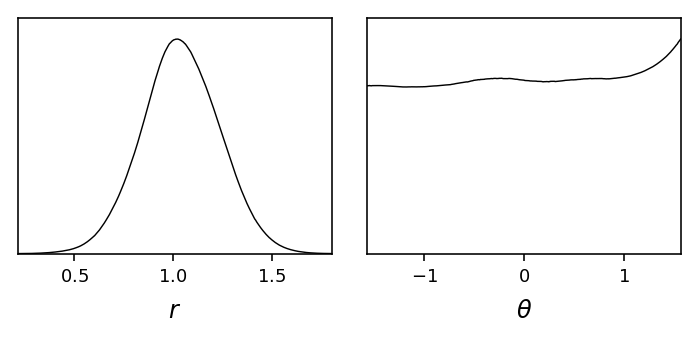

In [15]:
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

products = sampler.products()
gdsamples = MCSamplesFromCobaya(updated_info, products["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["x", "y"], filled=True)
gdplot.export("example_adv_ring.png")
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.plots_1d(gdsamples, ["r", "theta"], nx=2)
gdplot.export("example_adv_r_theta.png")

### Imposing $x>y$

In [17]:
info["prior"] = {"xGTy": lambda x,y: 1 if x>y else -np.inf}

from cobaya.run import run
updated_info_xGTy, sampler_xGTy = run(info)

[prior] *WARNING* External prior 'xGTy' loaded. Mind that it might not be normalized!
[ring] Initialized external likelihood.
[model] Setting measured speeds (per sec): {ring: 8120.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[mcmc] Initial point: x:1.00001, y:0
[mcmc] Sampling! (NB: no accepted step will be saved until 40 burn-in samples have been obtained)
[mcmc] Progress at [2020-02-27 20:30:23] : 1 steps taken -- still burning in, 40 accepted steps left.
[mcmc] Finished burn-in phase: discarded 40 accepted steps.
[mcmc] Checkpoint: 80 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.473
[mcmc] Convergence of means: R-1 = 6.527388 after 80 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 160 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.518
[mcmc] Co

[mcmc] Convergence of means: R-1 = 0.039748 after 2400 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2480 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.230
[mcmc] Convergence of means: R-1 = 0.037493 after 2480 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2560 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.229
[mcmc] Convergence of means: R-1 = 0.024567 after 2560 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2640 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.229
[mcmc] Convergence of means: R-1 = 0.016873 after 2640 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2720 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covma

[mcmc] Acceptance rate: 0.222
[mcmc] Convergence of means: R-1 = 0.001860 after 4960 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 5040 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.222
[mcmc] Convergence of means: R-1 = 0.001437 after 5040 accepted steps
[mcmc] Convergence of bounds: R-1 = 0.064089 after 5040 accepted steps
[mcmc] The run has converged!
[mcmc] Sampling complete after 5040 accepted steps.
[run] *WARNING* The variables returned by this function have changed since the last version: they were `(updated_info, sampler.products())` and they are now `(updated_info, sampler)`. Now you can get the `Model` used as `sampler.model`. (To turn off this warning, pass `_no_warn=True`.)


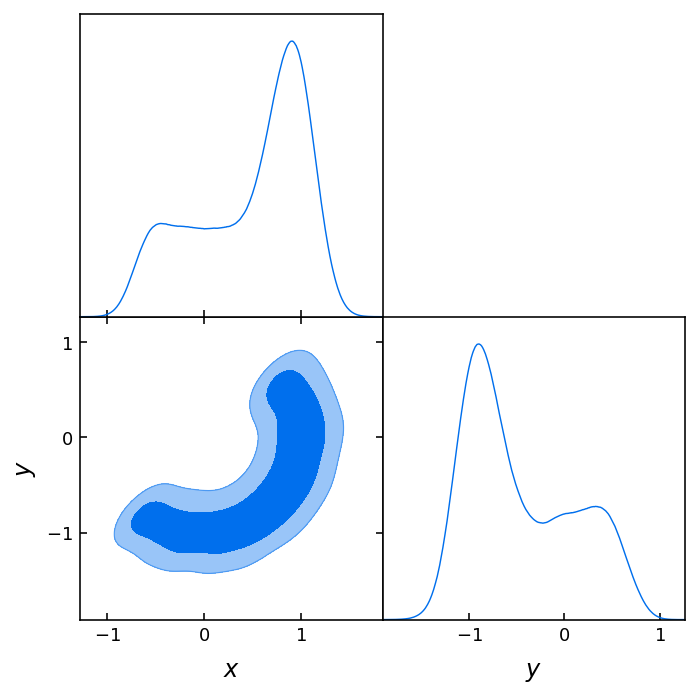

In [18]:
products_xGTy = sampler_xGTy.products()
gdsamples_xGTy = MCSamplesFromCobaya(
    updated_info_xGTy, products_xGTy["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_xGTy, ["x", "y"], filled=True)
gdplot.export("example_adv_half.png")

## Alternative: $r$ and $\theta$ as derived parameters of the likelihood

In [19]:
# List available derived paramters in the default value of the `derived` keyword
def gauss_ring_logp_with_derived(x, y, _derived=["r", "theta"]):
    r = np.sqrt(x**2+y**2)
    # Assuming `derived` is passed at runtime as a dictionary to be filled
    _derived["r"] = r
    _derived["theta"] = np.arctan(y/x)
    return stats.norm.logpdf(r, loc=1, scale=0.2)

# Now we don't need to *define* (but do need to *mention*) r or theta if we want their values output
info_alt = {"likelihood": {"ring": gauss_ring_logp_with_derived}}
info_alt["params"] = dict([
    ["x", {"prior": {"min": -2, "max": 2}, "ref": 1, "proposal": 0.2}],
    ["y", {"prior": {"min": -2, "max": 2}, "ref": 0, "proposal": 0.2}],
    ["r", None],
    ["theta", {"latex": r"\theta"}]])
info_alt["prior"] = {"xGTy": lambda x,y: np.log(x>y)}

In [20]:
info_alt["sampler"] = info["sampler"]
updated_info_alt, sampler_alt = run(info_alt)

[prior] *WARNING* External prior 'xGTy' loaded. Mind that it might not be normalized!
[ring] Initialized external likelihood.
[model] Setting measured speeds (per sec): {ring: 3650.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[mcmc] Initial point: x:1.00001, y:0
[mcmc] Sampling! (NB: no accepted step will be saved until 40 burn-in samples have been obtained)
[mcmc] Progress at [2020-02-27 20:30:47] : 1 steps taken -- still burning in, 40 accepted steps left.
[mcmc] Finished burn-in phase: discarded 40 accepted steps.
[mcmc] Checkpoint: 80 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.479
[mcmc] Convergence of means: R-1 = 2.598380 after 80 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.


/home/jesus/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


[mcmc] Checkpoint: 160 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.325
[mcmc] Convergence of means: R-1 = 0.609810 after 160 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 240 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.328
[mcmc] Convergence of means: R-1 = 0.306859 after 240 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 320 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.317
[mcmc] Convergence of means: R-1 = 0.428991 after 320 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 400 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.286
[mcmc] Convergence of means: R-1 = 0.097925 after 400 accepted steps
[mcmc] Updated covariance 

[mcmc] Checkpoint: 2720 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.218
[mcmc] Convergence of means: R-1 = 0.012019 after 2720 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2800 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.218
[mcmc] Convergence of means: R-1 = 0.010283 after 2800 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2880 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.218
[mcmc] Convergence of means: R-1 = 0.003387 after 2880 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2960 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.216
[mcmc] Convergence of means: R-1 = 0.002421 after 2960 accepted steps
[mcmc] Updated cov

[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 5280 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.216
[mcmc] Convergence of means: R-1 = 0.005162 after 5280 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 5360 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.216
[mcmc] Convergence of means: R-1 = 0.005339 after 5360 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 5440 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.216
[mcmc] Convergence of means: R-1 = 0.004154 after 5440 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 5520 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.216
[mcmc] Convergence of means: R-1 = 0.0

[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 7840 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.214
[mcmc] Convergence of means: R-1 = 0.006161 after 7840 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 7920 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.214
[mcmc] Convergence of means: R-1 = 0.005337 after 7920 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 8000 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.214
[mcmc] Convergence of means: R-1 = 0.005766 after 8000 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 8080 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.214
[mcmc] Convergence of means: R-1 = 0.0

[mcmc] Convergence of means: R-1 = 0.004096 after 10320 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 10400 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.213
[mcmc] Convergence of means: R-1 = 0.004145 after 10400 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 10480 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.213
[mcmc] Convergence of means: R-1 = 0.002451 after 10480 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 10560 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.213
[mcmc] Convergence of means: R-1 = 0.001642 after 10560 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 10640 samples accepted.
[mcmc] Ready to check convergence and learn a new propos

(2, 1)

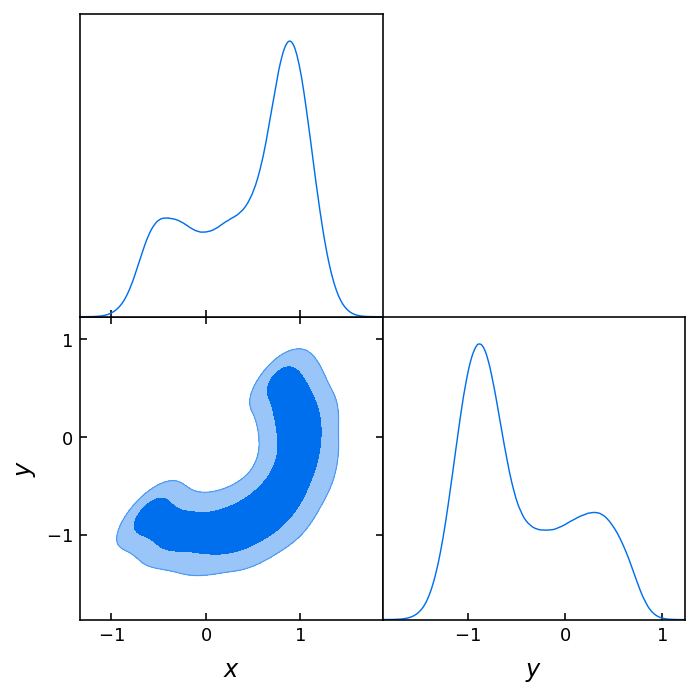

<Figure size 360x270 with 0 Axes>

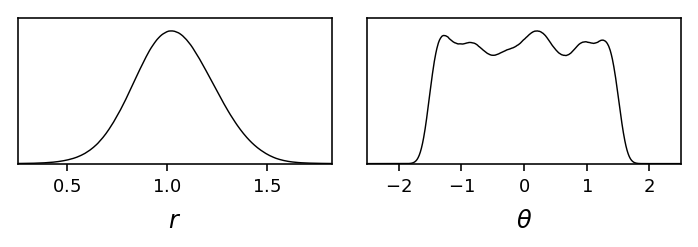

In [21]:
products_alt = sampler_alt.products()
gdsamples_alt = MCSamplesFromCobaya(
    updated_info_alt, products_alt["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_alt, ["x", "y"], filled=True)
gdplot = gdplt.get_single_plotter(width_inch=5)
gdplot.plots_1d(gdsamples_alt, ["r", "theta"], nx=2)

## Even better: sampling on $r$ and $\theta$ instead

In [22]:
from copy import deepcopy
info_rtheta = deepcopy(info)
info_rtheta["params"] = dict([
    ["r", {"prior": {"min": 0, "max": 2}, "ref": 1,
           "proposal": 0.5, "drop": True}],
    ["theta", {"prior": {"min": -0.75*np.pi, "max": np.pi/4}, "ref": 0,
               "proposal": 0.5, "latex": r"\theta", "drop": True}],
    ["x", "lambda r,theta: r*np.cos(theta)"],
    ["y", "lambda r,theta: r*np.sin(theta)"]])
# The x>y condition is already incorporated in the prior of theta
info_rtheta["prior"].pop("xGTy")

<function __main__.<lambda>(x, y)>

In [23]:
updated_info_rtheta, sampler_rtheta = run(info_rtheta)

[ring] Initialized external likelihood.
[model] Setting measured speeds (per sec): {ring: 3300.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[mcmc] Initial point: r:1.00001, theta:0
[mcmc] Sampling! (NB: no accepted step will be saved until 40 burn-in samples have been obtained)
[mcmc] Progress at [2020-02-27 20:32:27] : 1 steps taken -- still burning in, 41 accepted steps left.
[mcmc] Finished burn-in phase: discarded 40 accepted steps.
[mcmc] Checkpoint: 80 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.216
[mcmc] Convergence of means: R-1 = 1.722544 after 80 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 160 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.267
[mcmc] Convergence of means: R-1 = 0.064984 after 160 accepted steps
[mcmc] Updated covaria

[mcmc] Checkpoint: 2480 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.290
[mcmc] Convergence of means: R-1 = 0.006679 after 2480 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2560 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.289
[mcmc] Convergence of means: R-1 = 0.004264 after 2560 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2640 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.290
[mcmc] Convergence of means: R-1 = 0.005380 after 2640 accepted steps
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 2720 samples accepted.
[mcmc] Ready to check convergence and learn a new proposal covmat
[mcmc] Acceptance rate: 0.292
[mcmc] Convergence of means: R-1 = 0.008531 after 2720 accepted steps
[mcmc] Updated cov

[root] *WARNING* auto bandwidth for theta very small or failed (h=0.0006338402397983973,N_eff=2275.906616805109). Using fallback (h=0.08338448285981409)


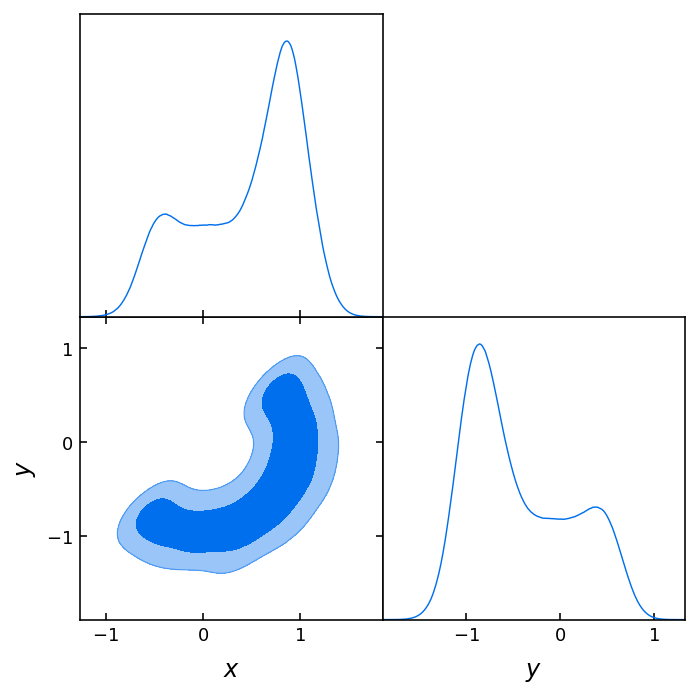

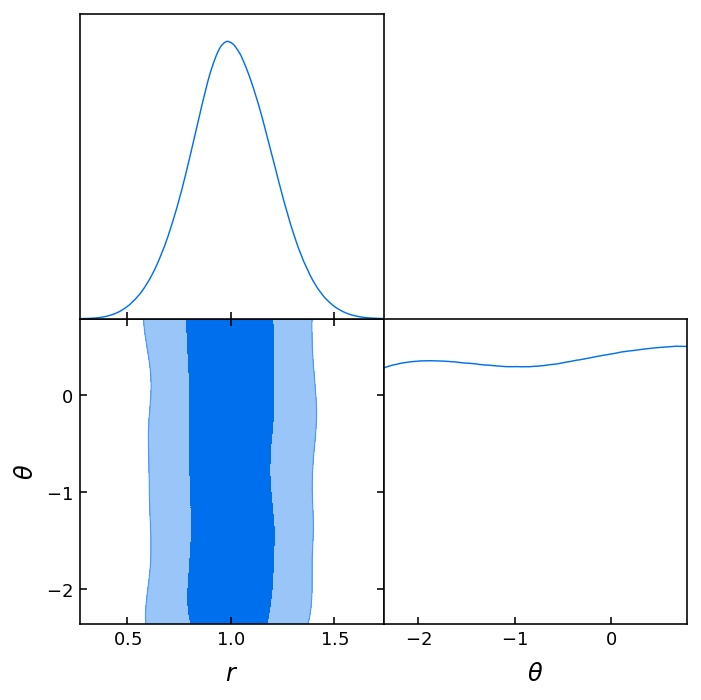

In [24]:
products_rtheta = sampler_rtheta.products()
gdsamples_rtheta = MCSamplesFromCobaya(
    updated_info_rtheta, products_rtheta["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_rtheta, ["x", "y"], filled=True)
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_rtheta, ["r", "theta"], filled=True)